In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
Dataframe = pd.read_csv('Data_tiki_general.csv')
columns_to_string = ['name','seller_name','category']
Dataframe[columns_to_string] = Dataframe[columns_to_string].astype(pd.StringDtype)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\3566894629.py:3: UserWarning: Instantiating StringDtype without any arguments.Pass a StringDtype instance to silence this warning.
  Dataframe[columns_to_string] = Dataframe[columns_to_string].astype(pd.StringDtype)


In [102]:
pd.options.display.float_format = '{:,.2f}'.format
Dataframe.describe(include='all')

,Unnamed: 0,name,price,original_price,discount,rating,review_count,sales_count,seller_name,category
count,758.00,758,758.00,758.00,758.00,758.00,758.00,758.00,758,758
unique,NaN,747,NaN,NaN,NaN,NaN,NaN,NaN,138,6
top,NaN,"Quạt Tích Điện, Quạt Đứng Thông Minh XIAOMI Sm...",NaN,NaN,NaN,NaN,NaN,NaN,Tiki Trading,Quạt Điện
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,155,184
mean,"1,560.73",NaN,"805,567.16","998,496.33",14.02,4.61,37.83,220.19,NaN,NaN
std,865.97,NaN,"559,770.55","754,715.70",18.84,0.69,194.87,"1,123.73",NaN,NaN
min,0.00,NaN,"189,000.00","189,000.00",0.00,1.00,1.00,1.00,NaN,NaN
25%,853.25,NaN,"350,625.00","420,000.00",0.00,4.50,1.00,5.00,NaN,NaN
50%,"1,487.00",NaN,"600,000.00","755,500.00",0.00,4.80,3.00,15.00,NaN,NaN
75%,"2,380.25",NaN,"1,157,250.00","1,452,250.00",30.00,5.00,12.00,56.75,NaN,NaN


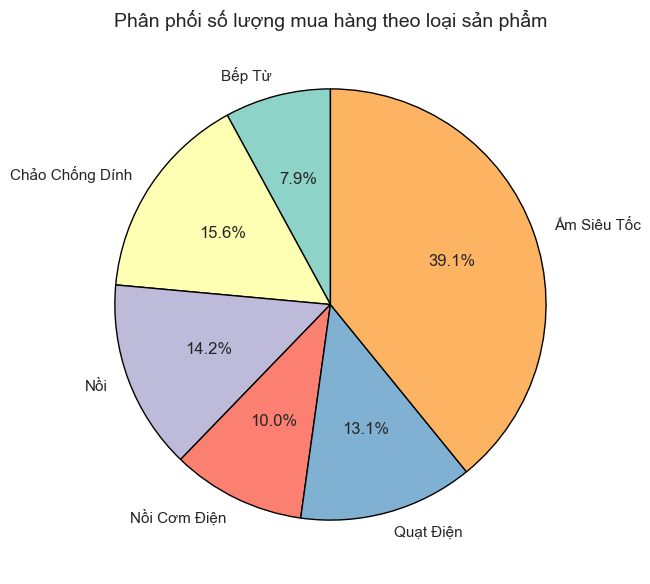

In [103]:
# Khảo sát lượng mua hàng theo từng loại sản phẩm
category_sales = Dataframe.groupby('category')['sales_count'].sum()
plt.figure(figsize=(7,7))
plt.pie(category_sales,
        labels=category_sales.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops={'edgecolor': 'black'})
plt.title('Phân phối số lượng mua hàng theo loại sản phẩm', fontsize=14)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\1797927363.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_total, x='category', y='revenue', palette='Set1', width=0.6)


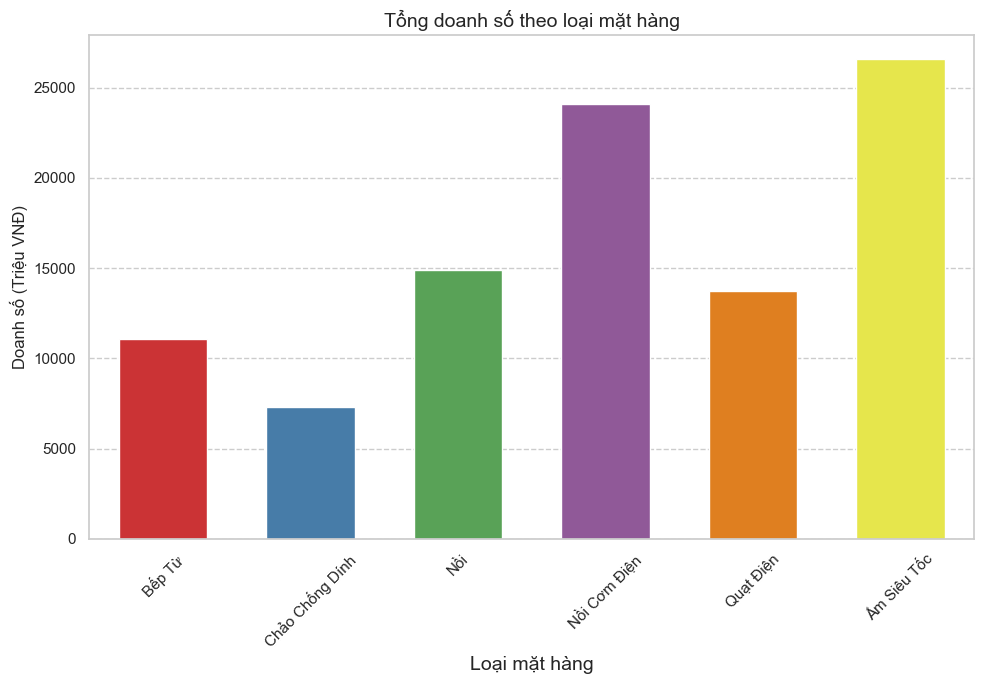

In [104]:
# Khảo sát doanh số theo từng loại mặt hàng
Dataframe['revenue'] = Dataframe['price'] * Dataframe['sales_count']
Dataframe['revenue'] = Dataframe['revenue'] / (10**6)
revenue_total = Dataframe.groupby('category')['revenue'].sum().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,7))
sns.barplot(data=revenue_total, x='category', y='revenue', palette='Set1', width=0.6)
plt.title('Tổng doanh số theo loại mặt hàng', fontsize = 14)
plt.xlabel('Loại mặt hàng', fontsize = 14)
plt.ylabel('Doanh số (Triệu VNĐ)', fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle = '--', alpha = 1)
plt.tight_layout()
plt.show()

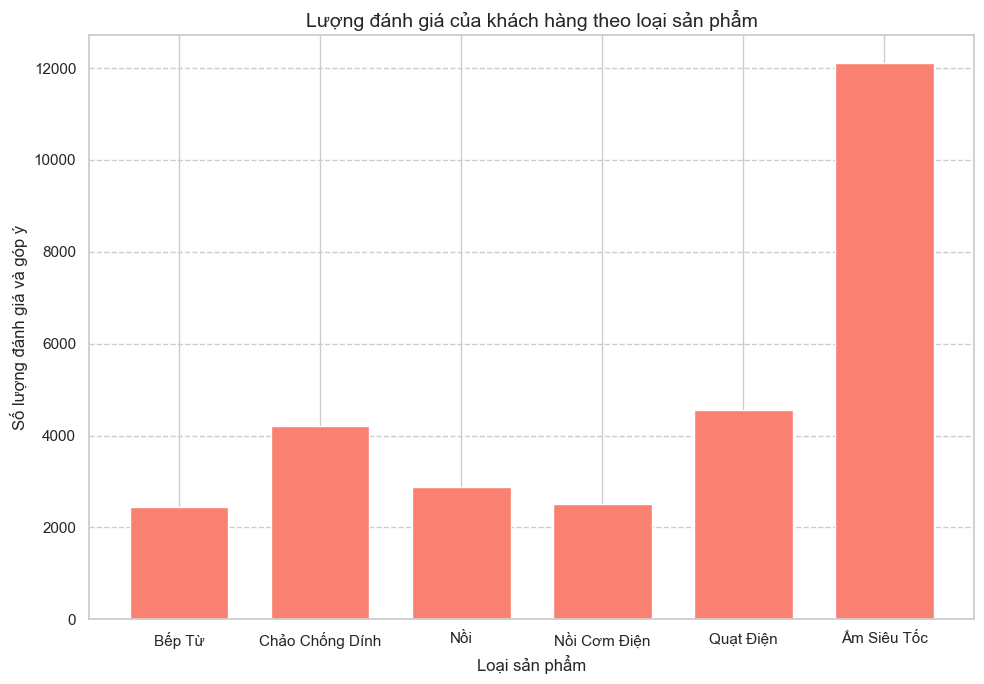

In [119]:
category_reviews = Dataframe.groupby('category')['review_count'].sum().reset_index()
plt.figure(figsize=(10, 7))
plt.bar(category_reviews['category'], category_reviews['review_count'], color = 'salmon', width=0.7)
plt.title("Lượng đánh giá của khách hàng theo loại sản phẩm", fontsize = 14)
plt.xlabel("Loại sản phẩm", fontsize = 12)
plt.ylabel("Số lượng đánh giá và góp ý", fontsize = 12)
plt.grid(axis='y', linestyle = '--', alpha = 1)
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\3412242537.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_counts = Dataframe.groupby(['category','rating_distribution'])['rating'].count().unstack(fill_value=0)


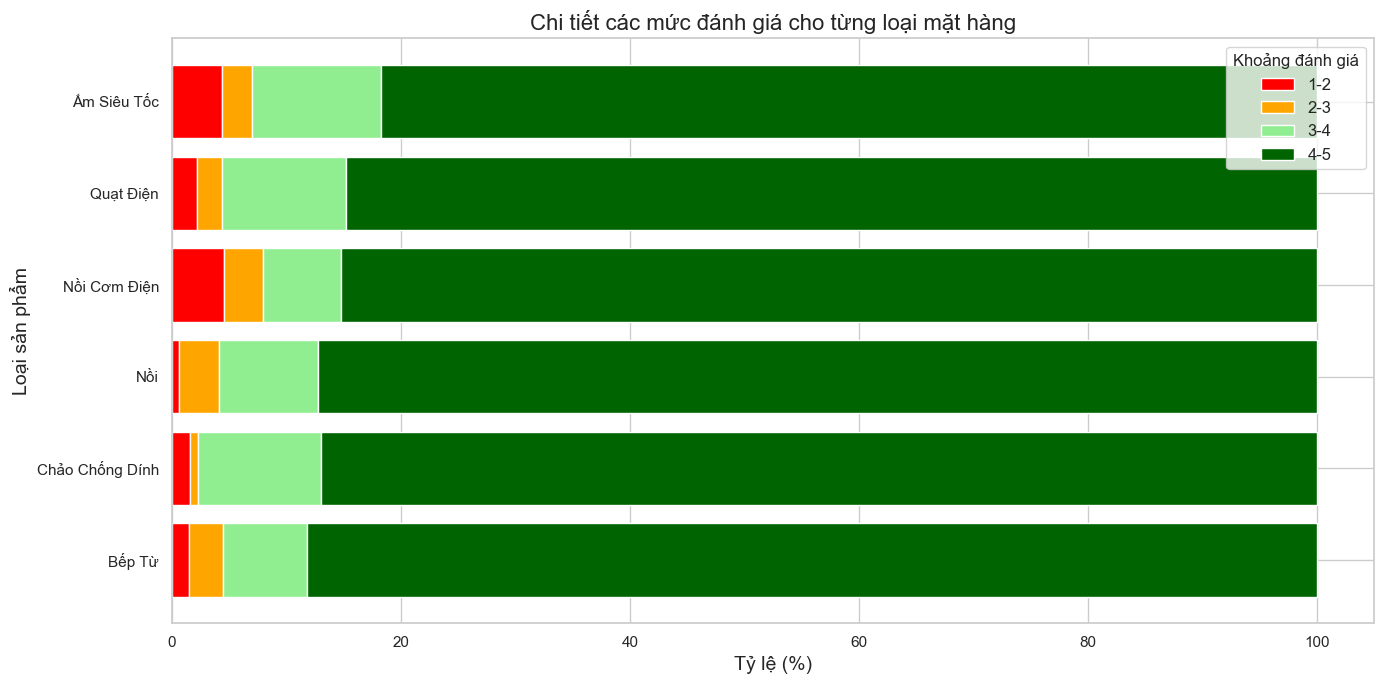

In [106]:
bin = [1, 2, 3, 4, 5]
label = ['1-2','2-3','3-4','4-5']
Dataframe['rating_distribution'] = pd.cut(Dataframe['rating'], bins=bin, labels = label, include_lowest=True)
rating_counts = Dataframe.groupby(['category','rating_distribution'])['rating'].count().unstack(fill_value=0)
rating_percentages = rating_counts.div(rating_counts.sum(axis=1), axis=0) * 100
categories = rating_percentages.index
bins = rating_percentages.columns
colors = ['#ff0000', '#ffa500', '#90ee90', '#006400']
plt.figure(figsize=(14,7))
for i, bin_label in enumerate(bins):
    plt.barh(categories, rating_percentages[bin_label], 
             left=rating_percentages.iloc[:, :i].sum(axis=1), 
             label=bin_label, color=colors[i])
plt.title('Chi tiết các mức đánh giá cho từng loại mặt hàng', fontsize=16)
plt.xlabel('Tỷ lệ (%)', fontsize=14)
plt.ylabel('Loại sản phẩm', fontsize=14)
plt.legend(title='Khoảng đánh giá', fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

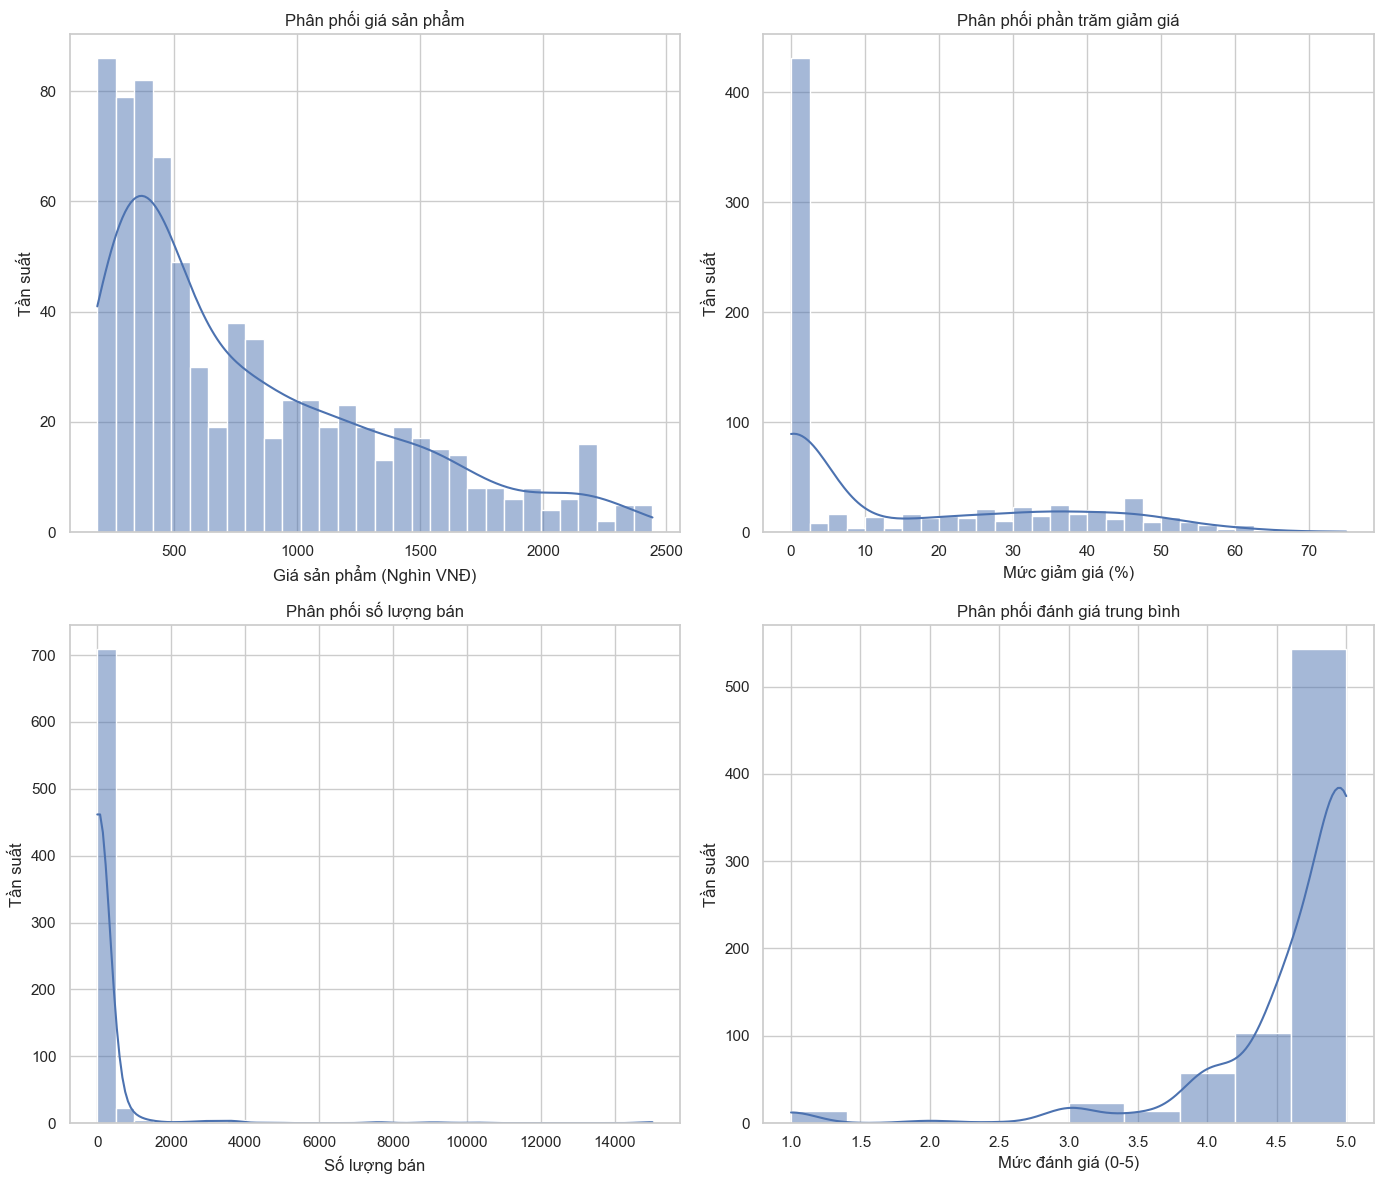

In [107]:
# Trực quan hóa phân phối dữ liệu
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Phân phối giá
sns.histplot(Dataframe['price']/1000, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Phân phối giá sản phẩm")
axes[0, 0].set_xlabel('Giá sản phẩm (Nghìn VNĐ)')
axes[0, 0].set_ylabel('Tần suất')

# Phân phối giảm giá
sns.histplot(Dataframe['discount'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Phân phối phần trăm giảm giá")
axes[0, 1].set_xlabel('Mức giảm giá (%)')
axes[0, 1].set_ylabel('Tần suất')

# Phân phối số lượng bán
sns.histplot(Dataframe['sales_count'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Phân phối số lượng bán")
axes[1, 0].set_xlabel('Số lượng bán')
axes[1, 0].set_ylabel('Tần suất')

# Phân phối đánh giá
sns.histplot(Dataframe['rating'], bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Phân phối đánh giá trung bình")
axes[1, 1].set_xlabel('Mức đánh giá (0-5)')
axes[1, 1].set_ylabel('Tần suất')

plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\3636860675.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df1['price'] / 1000
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\3636860675.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_range'] = pd.cut(df1['price'], bins=bins, labels=labels)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\3636860675.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of panda

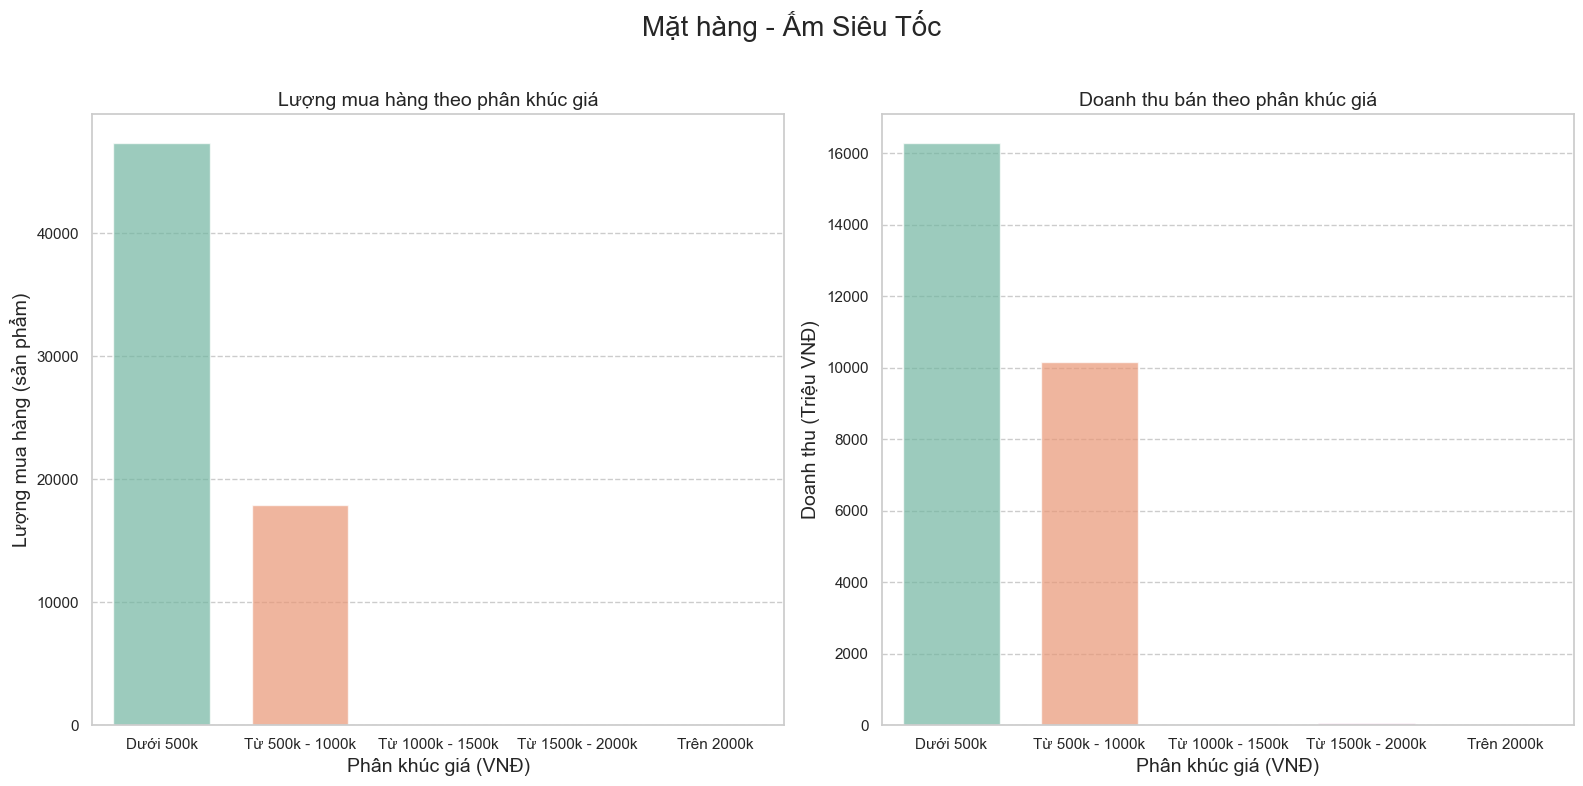

In [108]:
# Ấm Siêu Tốc
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) 

# Lượng mua hàng theo phân khúc giá
df1 = Dataframe[Dataframe['category'] == 'Ấm Siêu Tốc']
df1['price'] = df1['price'] / 1000
bins = [0, 500, 1000, 1500, 2000, float('inf')]
labels = ['Dưới 500k', 'Từ 500k - 1000k', 'Từ 1000k - 1500k', 'Từ 1500k - 2000k', 'Trên 2000k']
df1['price_range'] = pd.cut(df1['price'], bins=bins, labels=labels)
sales_by_price_range = df1.groupby('price_range')['sales_count'].sum().reset_index()
sns.barplot(data=sales_by_price_range, x='price_range', y='sales_count', palette='Set2', alpha=0.7, width=0.7, ax=axes[0])
axes[0].set_title("Lượng mua hàng theo phân khúc giá", fontsize=14)
axes[0].set_xlabel("Phân khúc giá (VNĐ)", fontsize=14)
axes[0].set_ylabel("Lượng mua hàng (sản phẩm)", fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=1)

# Doanh thu bán theo phân khúc giá
df2 = Dataframe[Dataframe['category'] == 'Ấm Siêu Tốc']
df2['price'] = df2['price'] / 1000
df2['revenue'] = df2['price'] * df2['sales_count'] / 1000
df2['price_range'] = pd.cut(df2['price'], bins=bins, labels=labels)
revenue_by_price_range = df2.groupby('price_range')['revenue'].sum().reset_index()
sns.barplot(data=revenue_by_price_range, x='price_range', y='revenue', palette='Set2', alpha=0.7, width=0.7, ax=axes[1])
axes[1].set_title("Doanh thu bán theo phân khúc giá", fontsize=14)
axes[1].set_xlabel("Phân khúc giá (VNĐ)", fontsize=14)
axes[1].set_ylabel("Doanh thu (Triệu VNĐ)", fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=1)

plt.suptitle("Mặt hàng - Ấm Siêu Tốc", fontsize=20)
plt.tight_layout()  
plt.subplots_adjust(top=0.85) 
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\2107046833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df1['price'] / 1000
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\2107046833.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_range'] = pd.cut(df1['price'], bins=bins, labels=labels)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\2107046833.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of panda

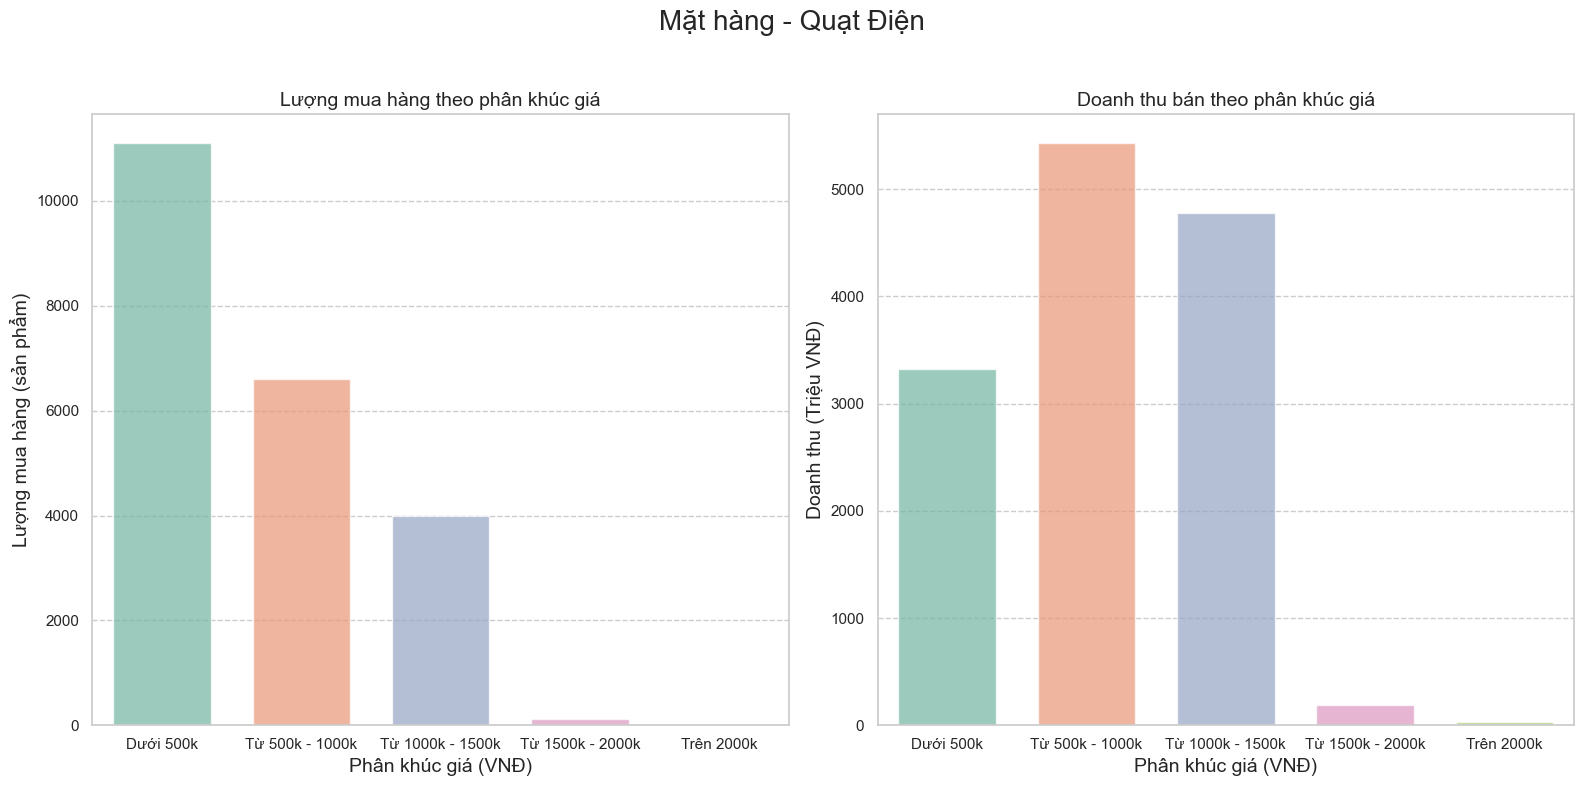

In [109]:
# Quạt điện
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) 

# Lượng mua hàng theo phân khúc giá
df1 = Dataframe[Dataframe['category'] == 'Quạt Điện']
df1['price'] = df1['price'] / 1000
bins = [0, 500, 1000, 1500, 2000, float('inf')]
labels = ['Dưới 500k', 'Từ 500k - 1000k', 'Từ 1000k - 1500k', 'Từ 1500k - 2000k', 'Trên 2000k']
df1['price_range'] = pd.cut(df1['price'], bins=bins, labels=labels)
sales_by_price_range = df1.groupby('price_range')['sales_count'].sum().reset_index()
sns.barplot(data=sales_by_price_range, x='price_range', y='sales_count', palette='Set2', alpha=0.7, width=0.7, ax=axes[0])
axes[0].set_title("Lượng mua hàng theo phân khúc giá", fontsize=14)
axes[0].set_xlabel("Phân khúc giá (VNĐ)", fontsize=14)
axes[0].set_ylabel("Lượng mua hàng (sản phẩm)", fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=1)

# Doanh thu bán theo phân khúc giá
df2 = Dataframe[Dataframe['category'] == 'Quạt Điện']
df2['price'] = df2['price'] / 1000
df2['revenue'] = df2['price'] * df2['sales_count'] / 1000
df2['price_range'] = pd.cut(df2['price'], bins=bins, labels=labels)
revenue_by_price_range = df2.groupby('price_range')['revenue'].sum().reset_index()
sns.barplot(data=revenue_by_price_range, x='price_range', y='revenue', palette='Set2', alpha=0.7, width=0.7, ax=axes[1])
axes[1].set_title("Doanh thu bán theo phân khúc giá", fontsize=14)
axes[1].set_xlabel("Phân khúc giá (VNĐ)", fontsize=14)
axes[1].set_ylabel("Doanh thu (Triệu VNĐ)", fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=1)

plt.suptitle("Mặt hàng - Quạt Điện", fontsize=20)
plt.tight_layout()  
plt.subplots_adjust(top=0.85) 
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\701851046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df1['price'] / 1000
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\701851046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_range'] = pd.cut(df1['price'], bins=bins, labels=labels)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\701851046.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. 

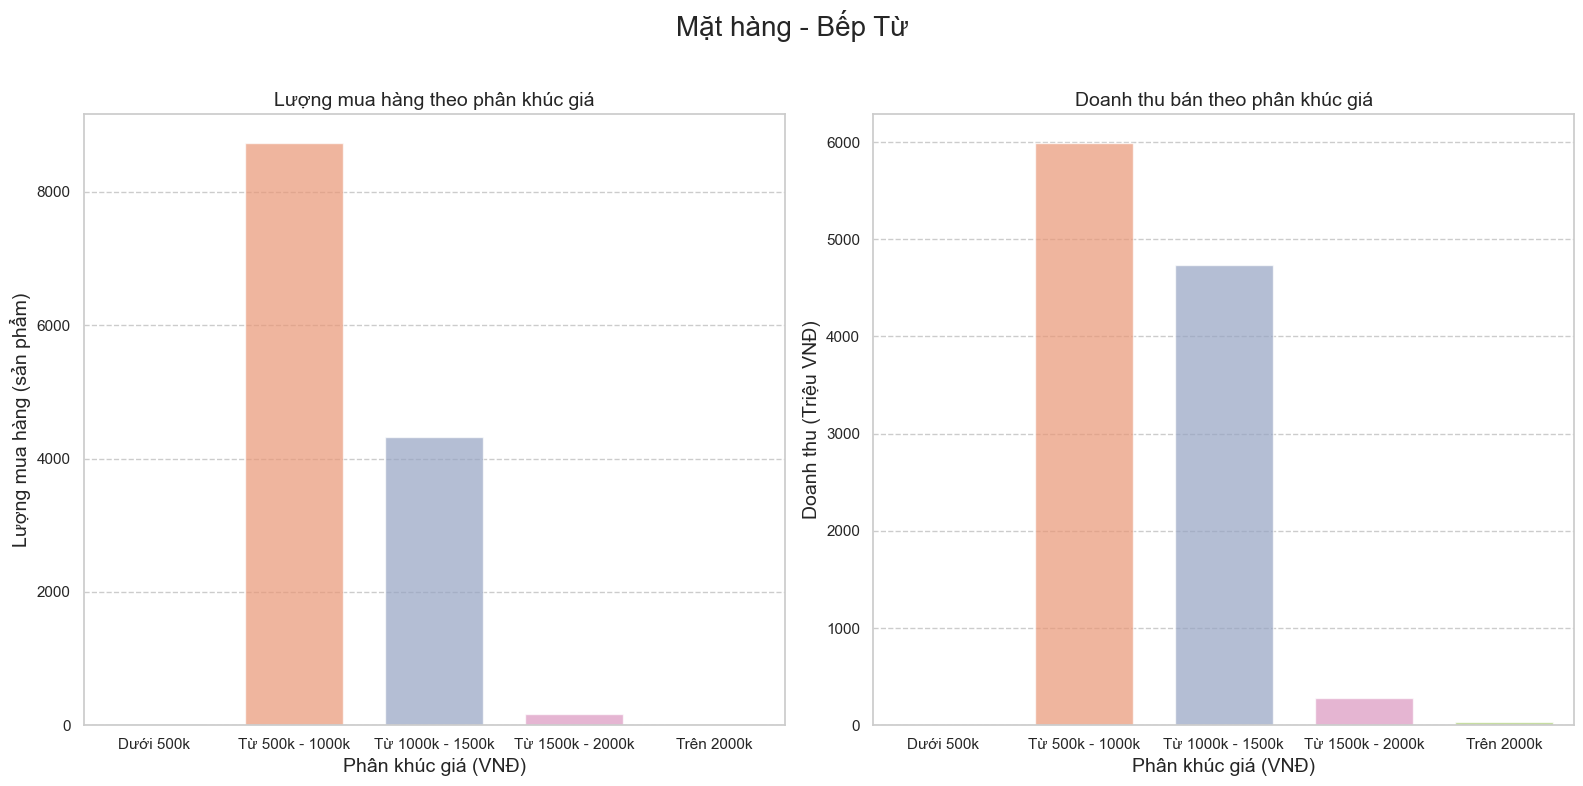

In [110]:
# Bếp từ
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) 

# Lượng mua hàng theo phân khúc giá
df1 = Dataframe[Dataframe['category'] == 'Bếp Từ']
df1['price'] = df1['price'] / 1000
bins = [0, 500, 1000, 1500, 2000, float('inf')]
labels = ['Dưới 500k', 'Từ 500k - 1000k', 'Từ 1000k - 1500k', 'Từ 1500k - 2000k', 'Trên 2000k']
df1['price_range'] = pd.cut(df1['price'], bins=bins, labels=labels)
sales_by_price_range = df1.groupby('price_range')['sales_count'].sum().reset_index()
sns.barplot(data=sales_by_price_range, x='price_range', y='sales_count', palette='Set2', alpha=0.7, width=0.7, ax=axes[0])
axes[0].set_title("Lượng mua hàng theo phân khúc giá", fontsize=14)
axes[0].set_xlabel("Phân khúc giá (VNĐ)", fontsize=14)
axes[0].set_ylabel("Lượng mua hàng (sản phẩm)", fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=1)

# Doanh thu bán theo phân khúc giá
df2 = Dataframe[Dataframe['category'] == 'Bếp Từ']
df2['price'] = df2['price'] / 1000
df2['revenue'] = df2['price'] * df2['sales_count'] / 1000
df2['price_range'] = pd.cut(df2['price'], bins=bins, labels=labels)
revenue_by_price_range = df2.groupby('price_range')['revenue'].sum().reset_index()
sns.barplot(data=revenue_by_price_range, x='price_range', y='revenue', palette='Set2', alpha=0.7, width=0.7, ax=axes[1])
axes[1].set_title("Doanh thu bán theo phân khúc giá", fontsize=14)
axes[1].set_xlabel("Phân khúc giá (VNĐ)", fontsize=14)
axes[1].set_ylabel("Doanh thu (Triệu VNĐ)", fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=1)

plt.suptitle("Mặt hàng - Bếp Từ", fontsize=20)
plt.tight_layout()  
plt.subplots_adjust(top=0.85) 
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\1064047902.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df1['price'] / 1000
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\1064047902.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_range'] = pd.cut(df1['price'], bins=bins, labels=labels)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\1064047902.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of panda

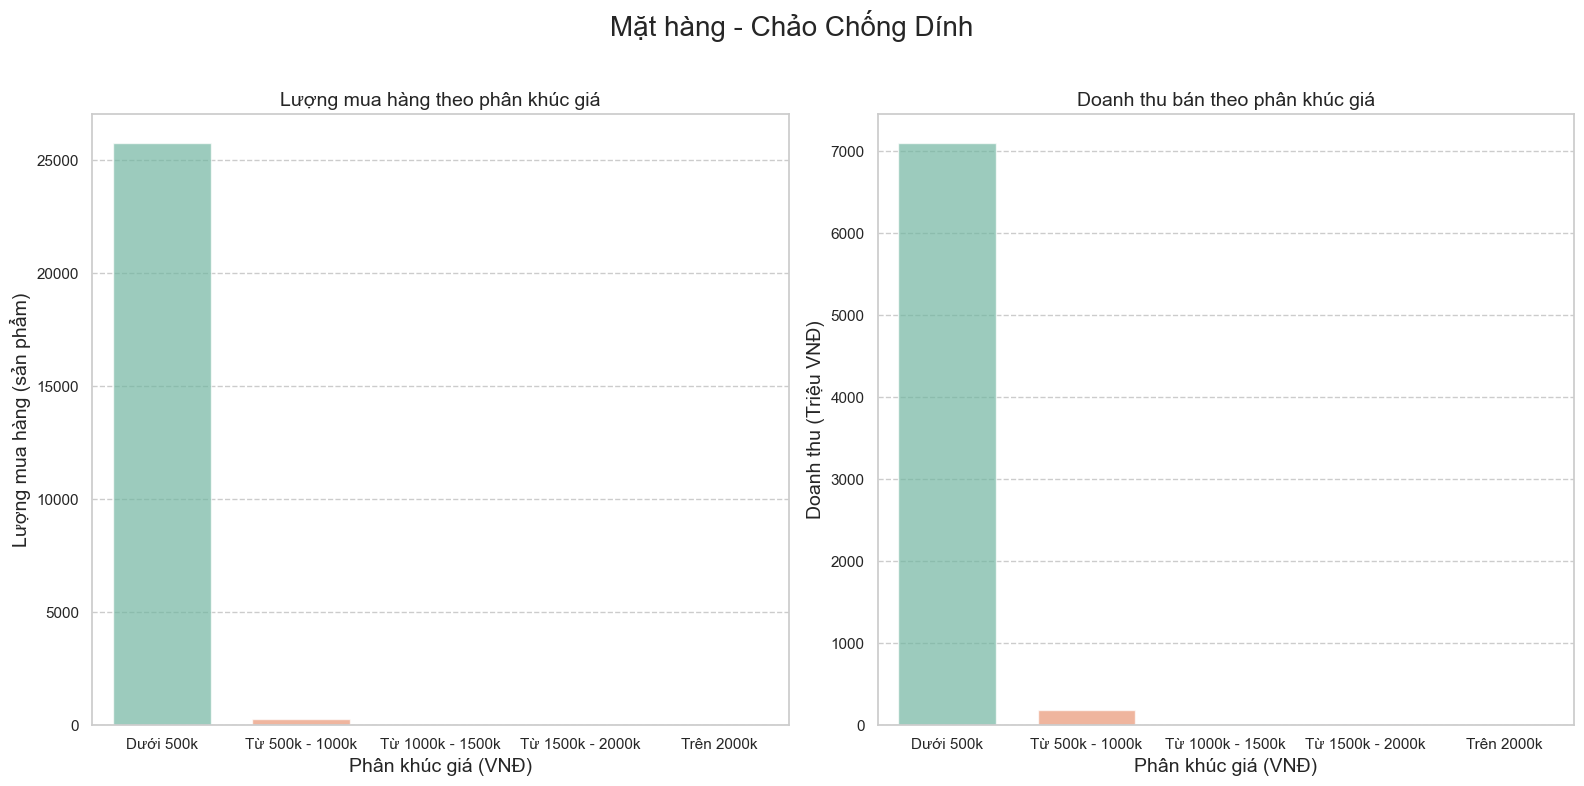

In [111]:
# Chảo chống dính
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) 

# Lượng mua hàng theo phân khúc giá
df1 = Dataframe[Dataframe['category'] == 'Chảo Chống Dính']
df1['price'] = df1['price'] / 1000
bins = [0, 500, 1000, 1500, 2000, float('inf')]
labels = ['Dưới 500k', 'Từ 500k - 1000k', 'Từ 1000k - 1500k', 'Từ 1500k - 2000k', 'Trên 2000k']
df1['price_range'] = pd.cut(df1['price'], bins=bins, labels=labels)
sales_by_price_range = df1.groupby('price_range')['sales_count'].sum().reset_index()
sns.barplot(data=sales_by_price_range, x='price_range', y='sales_count', palette='Set2', alpha=0.7, width=0.7, ax=axes[0])
axes[0].set_title("Lượng mua hàng theo phân khúc giá", fontsize=14)
axes[0].set_xlabel("Phân khúc giá (VNĐ)", fontsize=14)
axes[0].set_ylabel("Lượng mua hàng (sản phẩm)", fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=1)

# Doanh thu bán theo phân khúc giá
df2 = Dataframe[Dataframe['category'] == 'Chảo Chống Dính']
df2['price'] = df2['price'] / 1000
df2['revenue'] = df2['price'] * df2['sales_count'] / 1000
df2['price_range'] = pd.cut(df2['price'], bins=bins, labels=labels)
revenue_by_price_range = df2.groupby('price_range')['revenue'].sum().reset_index()
sns.barplot(data=revenue_by_price_range, x='price_range', y='revenue', palette='Set2', alpha=0.7, width=0.7, ax=axes[1])
axes[1].set_title("Doanh thu bán theo phân khúc giá", fontsize=14)
axes[1].set_xlabel("Phân khúc giá (VNĐ)", fontsize=14)
axes[1].set_ylabel("Doanh thu (Triệu VNĐ)", fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=1)

plt.suptitle("Mặt hàng - Chảo Chống Dính", fontsize=20)
plt.tight_layout()  
plt.subplots_adjust(top=0.85) 
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\3454157699.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df1['price'] / 1000
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\3454157699.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_range'] = pd.cut(df1['price'], bins=bins, labels=labels)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\3454157699.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of panda

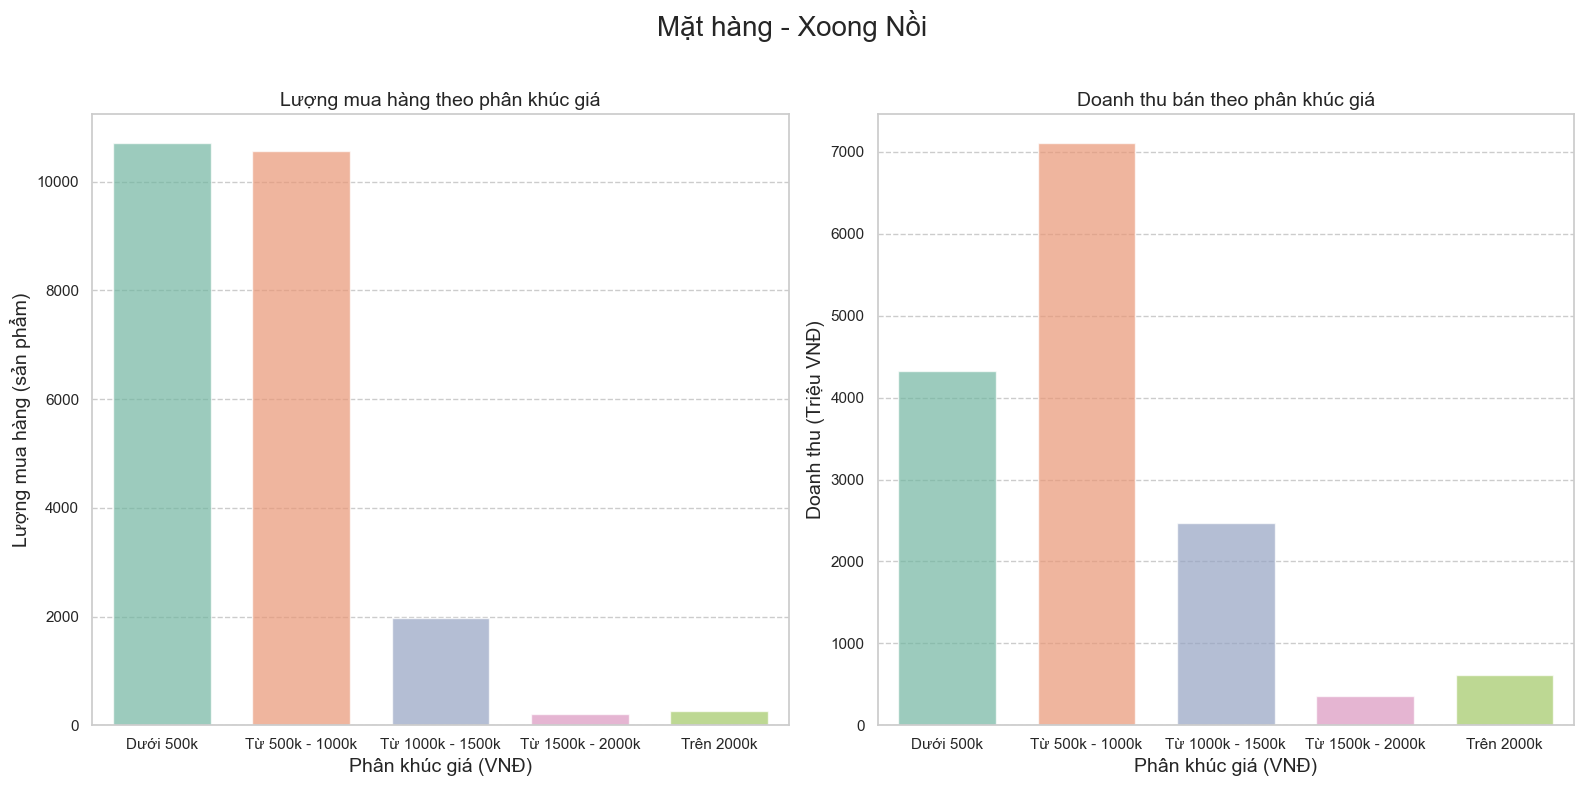

In [112]:
# Xoong nồi
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) 

# Lượng mua hàng theo phân khúc giá
df1 = Dataframe[Dataframe['category'] == 'Nồi']
df1['price'] = df1['price'] / 1000
bins = [0, 500, 1000, 1500, 2000, float('inf')]
labels = ['Dưới 500k', 'Từ 500k - 1000k', 'Từ 1000k - 1500k', 'Từ 1500k - 2000k', 'Trên 2000k']
df1['price_range'] = pd.cut(df1['price'], bins=bins, labels=labels)
sales_by_price_range = df1.groupby('price_range')['sales_count'].sum().reset_index()
sns.barplot(data=sales_by_price_range, x='price_range', y='sales_count', palette='Set2', alpha=0.7, width=0.7, ax=axes[0])
axes[0].set_title("Lượng mua hàng theo phân khúc giá", fontsize=14)
axes[0].set_xlabel("Phân khúc giá (VNĐ)", fontsize=14)
axes[0].set_ylabel("Lượng mua hàng (sản phẩm)", fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=1)

# Doanh thu bán theo phân khúc giá
df2 = Dataframe[Dataframe['category'] == 'Nồi']
df2['price'] = df2['price'] / 1000
df2['revenue'] = df2['price'] * df2['sales_count'] / 1000
df2['price_range'] = pd.cut(df2['price'], bins=bins, labels=labels)
revenue_by_price_range = df2.groupby('price_range')['revenue'].sum().reset_index()
sns.barplot(data=revenue_by_price_range, x='price_range', y='revenue', palette='Set2', alpha=0.7, width=0.7, ax=axes[1])
axes[1].set_title("Doanh thu bán theo phân khúc giá", fontsize=14)
axes[1].set_xlabel("Phân khúc giá (VNĐ)", fontsize=14)
axes[1].set_ylabel("Doanh thu (Triệu VNĐ)", fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=1)

plt.suptitle("Mặt hàng - Xoong Nồi", fontsize=20)
plt.tight_layout()  
plt.subplots_adjust(top=0.85) 
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\1233818628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df1['price'] / 1000
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\1233818628.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_range'] = pd.cut(df1['price'], bins=bins, labels=labels)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\1233818628.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of panda

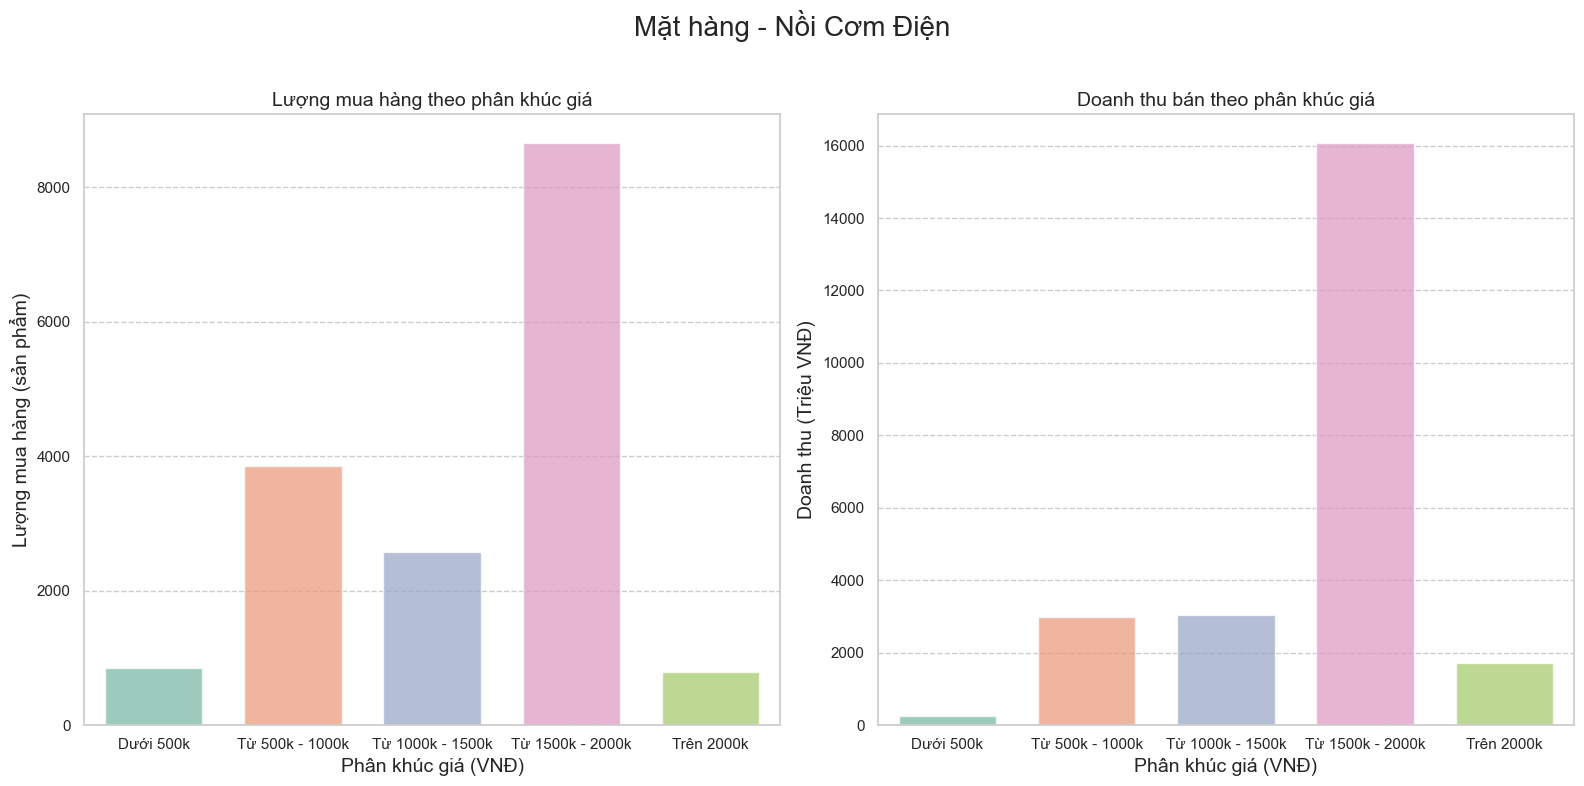

In [113]:
# Nồi cơm điện
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) 

# Lượng mua hàng theo phân khúc giá
df1 = Dataframe[Dataframe['category'] == 'Nồi Cơm Điện']
df1['price'] = df1['price'] / 1000
bins = [0, 500, 1000, 1500, 2000, float('inf')]
labels = ['Dưới 500k', 'Từ 500k - 1000k', 'Từ 1000k - 1500k', 'Từ 1500k - 2000k', 'Trên 2000k']
df1['price_range'] = pd.cut(df1['price'], bins=bins, labels=labels)
sales_by_price_range = df1.groupby('price_range')['sales_count'].sum().reset_index()
sns.barplot(data=sales_by_price_range, x='price_range', y='sales_count', palette='Set2', alpha=0.7, width=0.7, ax=axes[0])
axes[0].set_title("Lượng mua hàng theo phân khúc giá", fontsize=14)
axes[0].set_xlabel("Phân khúc giá (VNĐ)", fontsize=14)
axes[0].set_ylabel("Lượng mua hàng (sản phẩm)", fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=1)

# Doanh thu bán theo phân khúc giá
df2 = Dataframe[Dataframe['category'] == 'Nồi Cơm Điện']
df2['price'] = df2['price'] / 1000
df2['revenue'] = df2['price'] * df2['sales_count'] / 1000
df2['price_range'] = pd.cut(df2['price'], bins=bins, labels=labels)
revenue_by_price_range = df2.groupby('price_range')['revenue'].sum().reset_index()
sns.barplot(data=revenue_by_price_range, x='price_range', y='revenue', palette='Set2', alpha=0.7, width=0.7, ax=axes[1])
axes[1].set_title("Doanh thu bán theo phân khúc giá", fontsize=14)
axes[1].set_xlabel("Phân khúc giá (VNĐ)", fontsize=14)
axes[1].set_ylabel("Doanh thu (Triệu VNĐ)", fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=1)

plt.suptitle("Mặt hàng - Nồi Cơm Điện", fontsize=20)
plt.tight_layout()  
plt.subplots_adjust(top=0.85) 
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\1183052751.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  Heatmap = Dataframe.pivot_table(values='rating', index='price_range', columns='category', aggfunc='mean')


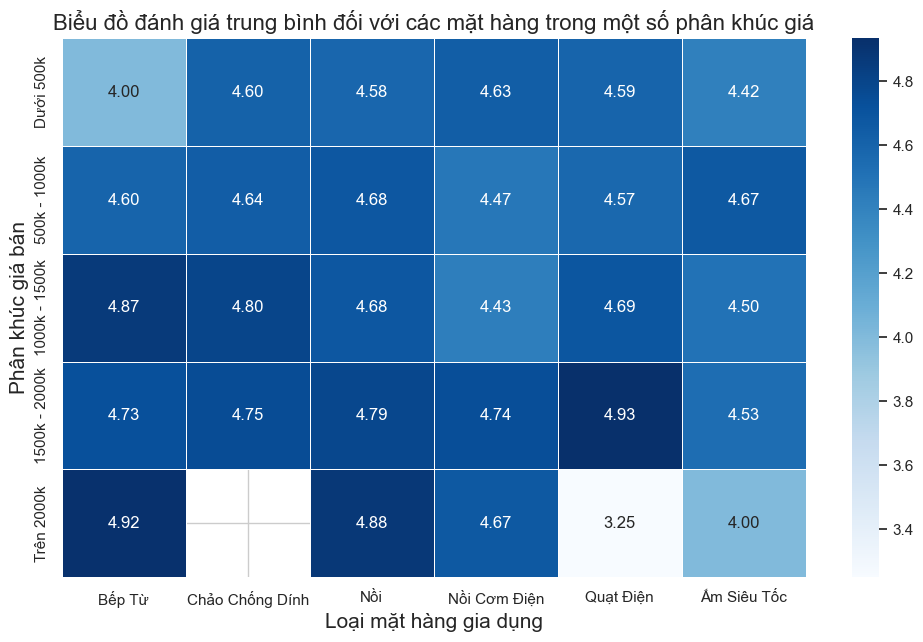

In [125]:
# Quan hệ giữa phân khúc giá và mức đánh giá trung bình theo từng mặt hàng
bins = [0, 500000, 1000000, 1500000, 2000000, float('inf')]
labels = ['Dưới 500k', '500k - 1000k', '1000k - 1500k', '1500k - 2000k', 'Trên 2000k']
Dataframe['price_range'] = pd.cut(Dataframe['price'], bins=bins, labels=labels)
Heatmap = Dataframe.pivot_table(values='rating', index='price_range', columns='category', aggfunc='mean')
plt.figure(figsize=(12, 7))
sns.heatmap(Heatmap, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5)
plt.title('Biểu đồ đánh giá trung bình đối với các mặt hàng trong một số phân khúc giá', fontsize=16)
plt.xlabel('Loại mặt hàng gia dụng', fontsize=15)
plt.ylabel('Phân khúc giá bán', fontsize=15)
plt.show()

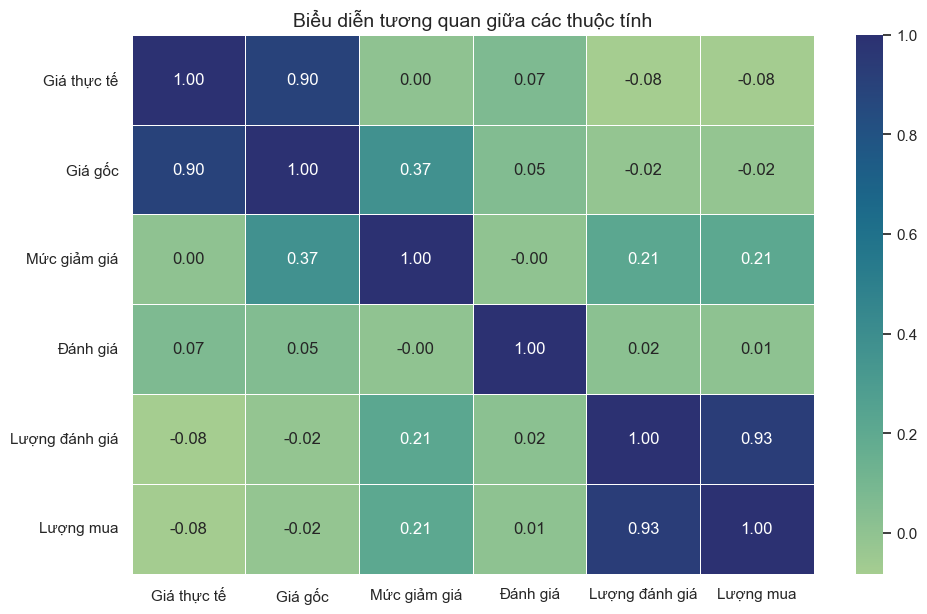

In [114]:
plt.figure(figsize=(11,7))
correlation_columns = ['price','original_price','discount','rating','review_count','sales_count']
rename_labels = ['Giá thực tế', 'Giá gốc', 'Mức giảm giá', 'Đánh giá', 'Lượng đánh giá', 'Lượng mua']
correlation_matrix = Dataframe[correlation_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5, xticklabels = rename_labels, yticklabels = rename_labels)
plt.title('Biểu diễn tương quan giữa các thuộc tính', fontsize = 14)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4384\822645296.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stores_stats.index, rotation=45, ha='right')


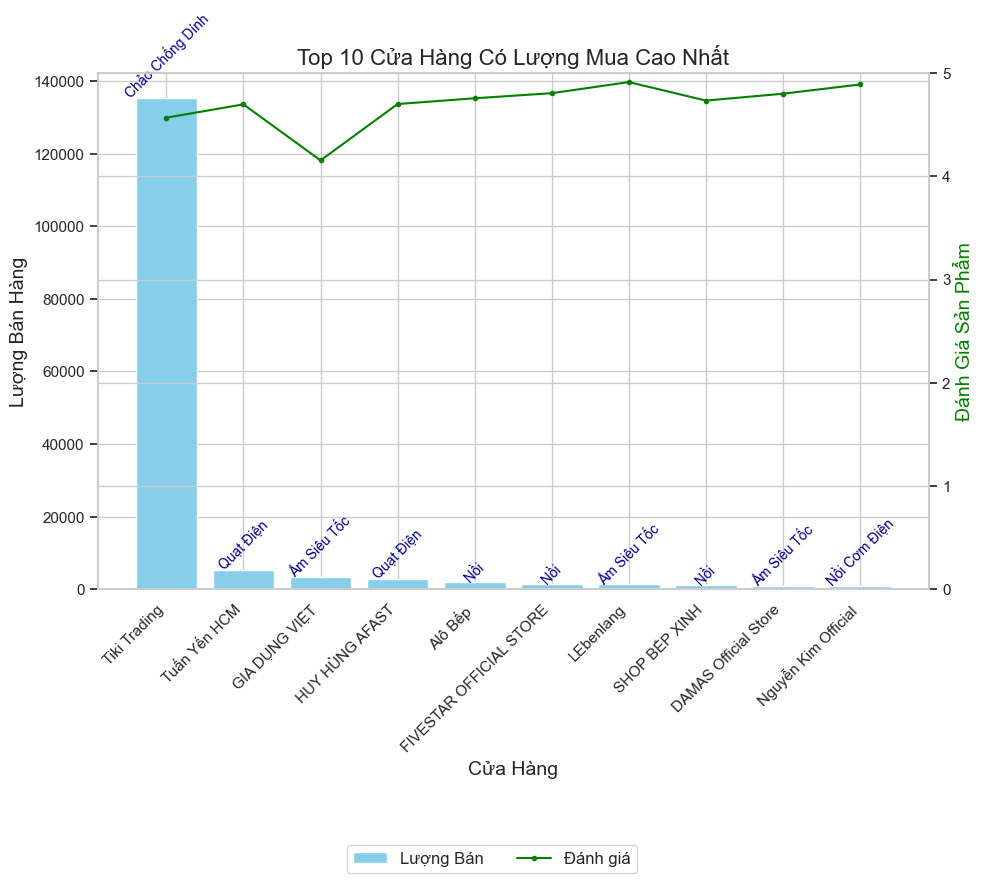

In [ ]:
# 10 cửa hàng có số lượng bán cao nhất
stores_stats = (
    Dataframe.groupby('seller_name').agg(
        total_sales_count = ('sales_count', 'sum'),
        average_rating = ('rating', 'mean'),
        main_category_sold = ('category', lambda x: x.mode()[0])
    ).sort_values(by='total_sales_count', ascending=False).head(10)
)
fig, ax1 = plt.subplots(figsize=(10, 8))
bars = ax1.bar(stores_stats.index, stores_stats['total_sales_count'], color = 'skyblue', label = 'Lượng Bán')
ax2 = ax1.twinx()
line, = ax2.plot(stores_stats.index, stores_stats['average_rating'], color = 'green', marker = '.', label = 'Đánh giá')
ax2.set_ylim(0, 5)
for i, (category, sales) in enumerate(zip(stores_stats['main_category_sold'], stores_stats['total_sales_count'])):
    ax1.text(i, sales + 5, f'{category}', ha='center', fontsize=10, color='darkblue', rotation=45)
ax1.set_ylabel('Lượng Bán Hàng', fontsize=14)
ax2.set_ylabel('Đánh Giá Sản Phẩm', fontsize=14, color='green')
ax1.set_xlabel('Cửa Hàng', fontsize=14)
ax1.set_title('Top 10 Cửa Hàng Có Lượng Mua Cao Nhất', fontsize=16)
ax1.set_xticklabels(stores_stats.index, rotation=45, ha='right')
fig.legend(handles=[bars, line], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)
plt.tight_layout()
plt.show()